# Preparation

In [1]:
from XRDXRFutils.notebook_utils import *

### Base path ###
#path_shared = '/home/shared/'
path_shared = '../../shared/'

### Input ###
list_path_database = [path_shared + 'Database16_42/']   # tabulated phases

### Read phase database ###
print('Reading phases from: ' + ', '.join(["'" + path + "'" for path in list_path_database]))
database = DatabaseXRD()
for path_database in list_path_database:
    database.read_cifs(path_database)
print(f'Total number of phases: {len(database)}')

Reading phases from: '../../shared/Database16_42/'
Total number of phases: 436


# Choose phase

### View phases of chosen elements
- `elements_chosen`: Elements that need to be in the selected phases.
- `elements_excluded`: Elements that must not be in the selected phases.

In [2]:
elements_chosen = ['Fe']
elements_excluded = []

df_phases = DataFrame(columns = ['Name in database', 'Chemical formula', 'N. of samples'])
for phase_name, phase_set in sorted(database.items()):
    p = phase_set[0]
    if '_chemical_formula_sum' in p:
        
        # Change 'all' (the first) into 'any' if you want to select phases that have at least one of elements_chosen
        
        if (all(is_element_in_formula(e, p['_chemical_formula_sum']) for e in elements_chosen)
            and all(not is_element_in_formula(e, p['_chemical_formula_sum']) for e in elements_excluded)):
            df_phases.loc[len(df_phases)] = [phase_name, p['_chemical_formula_sum'], len(phase_set)]
elements_excluded = []
df_phases

,Name in database,Chemical formula,N. of samples
0,Akaganeite,Cl0.675 Fe4 O8,2
1,BurntUmberReddish,Fe Mn O Al H,1
2,Burnt_Sienna_Italian,Fe Mn O Al H,2
3,Burnt_Sienna_Italian_2,Fe Mn O Al H,1
4,Burnt_Umber_reddish,Fe Mn O Al H,1
5,Cromossido di ematite,Mg Al Co Cr Fe Cu,1
6,Erythrite,As4 Co4.02 Fe1.48 H32 Ni0.50 O32,1
7,Fe2 O3,Fe2 O3,10
8,Fe2MnO4,Fe2 Mn O4,1
9,FrenchOchreSoforouge,Fe2 O3,1


### Choose phase and parameters

In [3]:
rcParams['font.size'] = 18

### Parameters ###
min_theta = 17         # 10     # 17
max_theta = 42         # 100    # 42
min_intensity = 0.05   # among the tabulated peaks, selects only the ones above this threshold of intensity (scale between 0 and 1)   # 0.05
first_n_peaks = None   # selects the first n most intense peaks (if None, leaves all the peaks)
distance_merge = 0.20           # sigma used in the peaks of synthetic diffraction patterns
peak_selection = []    # use None or empty list to select all peaks

### Phase ###
phase = database['Akaganeite'][0]   # Akaganeite   # Fe2 O3
phase.select_peaks(peak_selection)
#phase = PhaseList([database['Potassium Iron Sulfate Hydroxide'][0], database['French_Ochre_SOFOROUGE'][0], database['Akaganeite'][0]])
None

# View merged peaks

### Peaks before merging

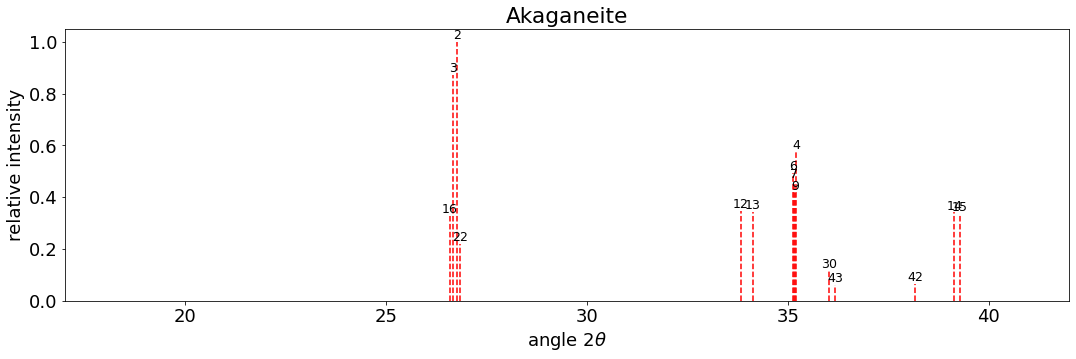

In [4]:
fig, ax = subplots(figsize = (18, 5))
sca(ax)
phase.plot(convolution = True, positions = True, min_theta = min_theta, max_theta = max_theta,
    min_intensity = min_intensity, first_n_peaks = first_n_peaks, distance_merge = None)
ax.set_xlim(min_theta, max_theta)
ax.set_ylim(0, None)
ax.set_xlabel(r'angle $2\theta$')
ax.set_ylabel(r'relative intensity')
ax.set_title(phase.label)
show()

### Peaks after merging

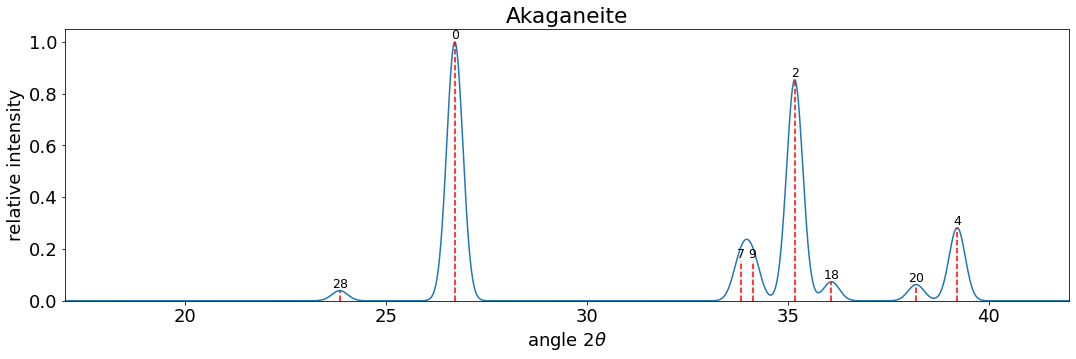

In [5]:
fig, ax = subplots(figsize = (18, 5))
sca(ax)
phase.plot(convolution = True, positions = True, min_theta = min_theta, max_theta = max_theta,
    min_intensity = min_intensity, first_n_peaks = first_n_peaks, distance_merge = distance_merge)
ax.set_xlim(min_theta, max_theta)
ax.set_ylim(0, None)
ax.set_xlabel(r'angle $2\theta$')
ax.set_ylabel(r'relative intensity')
ax.set_title(phase.label)
show()

# Follow the process step by step on a subset of peaks
Results may vary from the last section "View merged peaks". There we merged all the peaks and then selected them based on angle, intensity, and position. Here we proceed in opposite order: first we select peaks based on angle, intensity, and position; then we merge them.

### Get non-merged peaks of selected phase

In [6]:
theta, intensity, position = phase.get_theta(min_theta = min_theta, max_theta = max_theta,
    min_intensity = min_intensity, first_n_peaks = first_n_peaks)

### Plot peaks

N. of peaks in the plot: 7


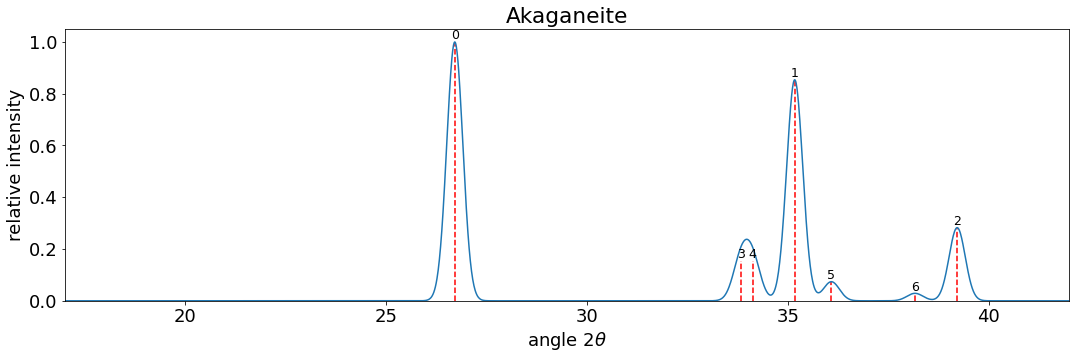

In [24]:
plot_convolution = True

###

# Assign position to peaks based on decreasing intensity
position = empty(len(theta), dtype = int)
idx_sorted = argsort(intensity)[::-1]
position[idx_sorted] = range(len(theta))

print(f'N. of peaks in the plot: {len(theta)}')

fig, ax = subplots(figsize = (18, 5))
ax.vlines(theta, 0, intensity, colors = 'red', linestyles = 'dashed')
for i in range(len(theta)):
    if (min_theta < theta[i] < max_theta):
        ax.text(theta[i], intensity[i], f'{position[i]}', ha = 'center', va = 'bottom', fontsize = 'x-small')
if plot_convolution:
    gamma = full((1, len(theta)), 1)
    sigma2 = full((1, len(theta)), distance_merge**2)
    mu = theta[newaxis, :]
    I = intensity[newaxis, :]
    theta_to_plot = arange(min_theta, max_theta, 0.01)[:, newaxis]
    component_core = exp((theta_to_plot - mu)**2 / (-2 * sigma2))
    component_full = I * gamma * component_core
    z = component_full.sum(axis = 1)
    ax.plot(theta_to_plot, z)
ax.set_xlim(min_theta, max_theta)
ax.set_ylim(0, None)
ax.set_xlabel(r'angle $2\theta$')
ax.set_ylabel(r'relative intensity')
ax.set_title(phase.label)
show()

### Do 1 step of merging

In [25]:
if len(theta) > 1:
    weight = intensity.copy()
    theta_diff = theta[1:] - theta[:-1]
    idx_min = argmin(theta_diff)
    print('Couple of nearest peaks\n-----------------------')
    print(f'Angular positions: {theta[idx_min]:.3f}, {theta[idx_min + 1]:.3f}')
    print(f'Angular difference: {theta_diff[idx_min]:.3f}')
    print(f'Intensities: {intensity[idx_min]:.3f}, {intensity[idx_min + 1]:.3f}')
    if (theta_diff[idx_min] <= distance_merge):
        print(f'Angular difference <= theta: the two peaks will be merged.')
        theta_point = (weight[idx_min] * theta[idx_min] + weight[idx_min + 1] * theta[idx_min + 1]) / (weight[idx_min] + weight[idx_min + 1])
        #intensity_point = intensity[idx_min] + intensity[idx_min + 1]
        intensity_point = (intensity[idx_min] * exp((theta_point - theta[idx_min])**2 / (-2 * distance_merge**2)) +
                           intensity[idx_min + 1] * exp((theta_point - theta[idx_min + 1])**2 / (-2 * distance_merge**2)))
        weight_point = weight[idx_min] + weight[idx_min + 1]
        theta[idx_min] = theta_point
        intensity[idx_min] = intensity_point
        weight[idx_min] = weight_point
        theta = delete(theta, [idx_min + 1])
        intensity = delete(intensity, [idx_min + 1])
        weight = delete(weight, [idx_min + 1])
    else:
        print(f'Angular difference > theta: no peaks will be merged.')
else:
    print('N. of peaks <= 1: cannot merge peaks.')

intensity /= intensity.max()

Couple of nearest peaks
-----------------------
Angular positions: 33.826, 34.115
Angular difference: 0.288
Intensities: 0.155, 0.153
Angular difference > theta: no peaks will be merged.
